Proyecto Parte 2
Nombre: Jefferson Collantes

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
path = 'C:/Users/jeffe/Documents/GIT/python/py-collantes-yunga-jefferson-paul/Proyecto_Individual/CSV/data/USA_cars_datasets.csv'
columns = ['price','brand','model','year','title_status','mileage','color','state','country','condition']

In [8]:
imdb = pd.read_csv(path, usecols=columns)
imdb.head()

,price,brand,model,year,title_status,mileage,color,state,country,condition
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,new jersey,usa,10 days left
1,2899,ford,se,2011,clean vehicle,190552.0,silver,tennessee,usa,6 days left
2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,georgia,usa,2 days left
3,25000,ford,door,2014,clean vehicle,64146.0,blue,virginia,usa,22 hours left
4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,florida,usa,22 hours left


In [6]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         2499 non-null   int64  
 1   brand         2499 non-null   object 
 2   model         2499 non-null   object 
 3   year          2499 non-null   int64  
 4   title_status  2499 non-null   object 
 5   mileage       2499 non-null   float64
 6   color         2499 non-null   object 
 7   state         2499 non-null   object 
 8   country       2499 non-null   object 
 9   condition     2499 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 195.4+ KB


In [20]:
imdb['brand'].value_counts()

ford               1235
dodge               432
nissan              312
chevrolet           297
gmc                  42
jeep                 30
chrysler             18
bmw                  17
hyundai              15
kia                  13
buick                13
honda                12
infiniti             12
mercedes-benz        10
cadillac             10
heartland             5
peterbilt             4
land                  4
audi                  4
acura                 3
mazda                 2
lincoln               2
lexus                 2
jaguar                1
toyota                1
harley-davidson       1
ram                   1
maserati              1
Name: brand, dtype: int64

1. Porcentaje de precios por autos 

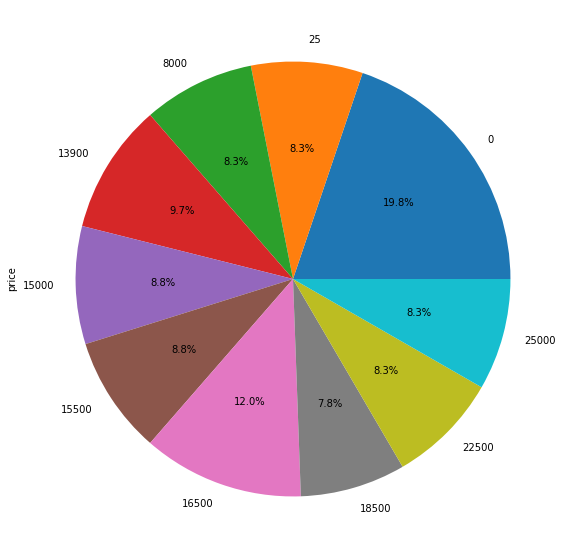

In [23]:
car_price = imdb['price'].value_counts().head(10).sort_index().plot.pie(autopct='%1.1f%%',figsize=(10,10))
#car_price.set_tittle("Autos mas caros")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000164DC5287C8>,
      dtype=object)

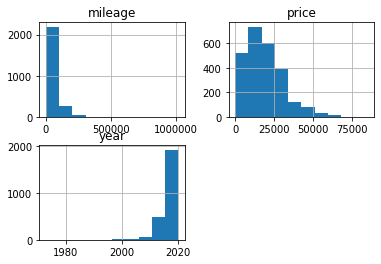

In [24]:
imdb.hist()

2. Rango de precios por autos

Text(0, 0.5, 'Numero de autos')

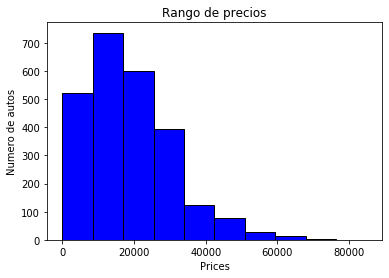

In [7]:
plt.hist(imdb['price'], color = 'blue', edgecolor = 'black',bins=10)
plt.title('Rango de precios')
plt.xlabel('Prices')
plt.ylabel('Numero de autos')

In [8]:
imdb.describe()

,price,year,mileage
count,2499.000000,2499.000000,2.499000e+03
mean,18767.671469,2016.714286,5.229869e+04
std,12116.094936,3.442656,5.970552e+04
min,0.000000,1973.000000,0.000000e+00
25%,10200.000000,2016.000000,2.146650e+04
50%,16900.000000,2018.000000,3.536500e+04
75%,25555.500000,2019.000000,6.347250e+04
max,84900.000000,2020.000000,1.017936e+06


Algunos autos poseen precios de cero lo cual no puede ser cierto para ello pondremos un valor medio en es campo 

In [10]:
median_price = imdb['price'].median()
imdb['price'] = imdb['price'].astype(int)
imdb['price'].replace(0,median_price ,inplace=True)
median_price

16900.0

In [19]:
import seaborn as sns

3. Relacion entres precios y kilometreajes

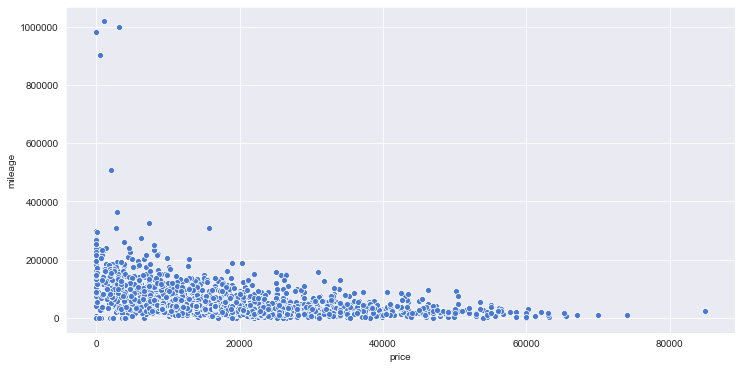

In [14]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=imdb['price'], y=imdb['mileage']);

4. Vehiculos clean vehicle(no han sufrido daños o pérdidas críticas.) y  vehiculos salvage insurance (que han sido dañados y / o considerados una pérdida total por una compañía de seguros.)

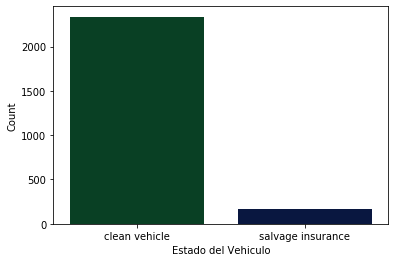

In [32]:
fig, ax = plt.subplots()
sns.set_palette("ocean")
sns.countplot(x = "title_status", data = imdb, ax = ax)
ax.set_xlabel("Estado del Vehiculo")
ax.set_ylabel("Count")
plt.show()



5. Top de los 5 colores mas usados en autos con sus precios 

In [33]:
top5_colors = list(imdb.color.value_counts()[0:5].index)
top5_colors

['white', 'black', 'gray', 'silver', 'red']

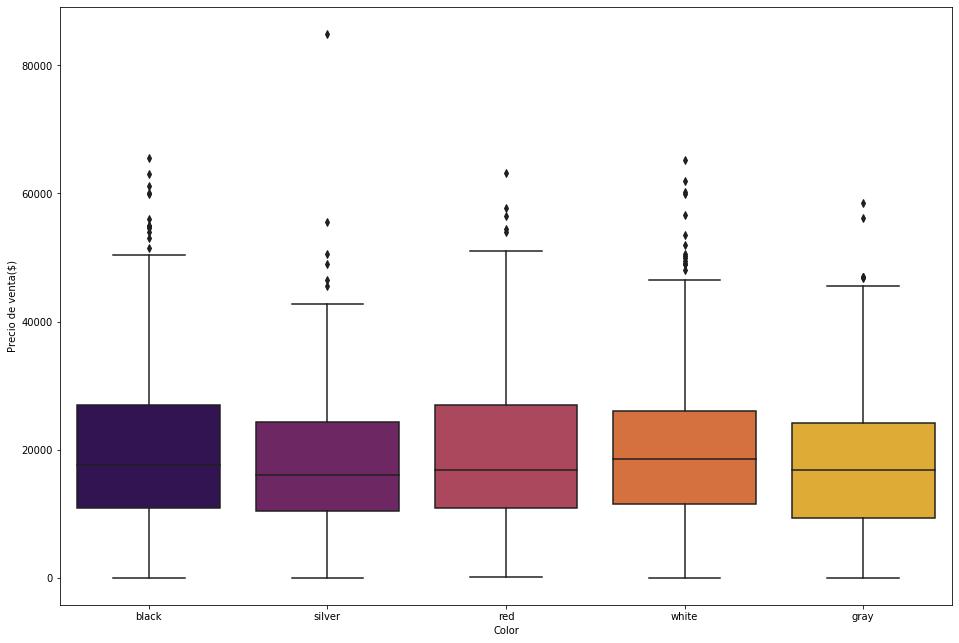

In [35]:
df_top5_color = imdb[imdb["color"].isin(top5_colors)]
fig, ax = plt.subplots(figsize = (16,11))
sns.boxplot(x = "color", y = "price",data = df_top5_color,palette = "inferno", ax = ax)
ax.set_xlabel("Color")
ax.set_ylabel("Precio de venta($)")
plt.show()

6. El estado del que provienen mas autos

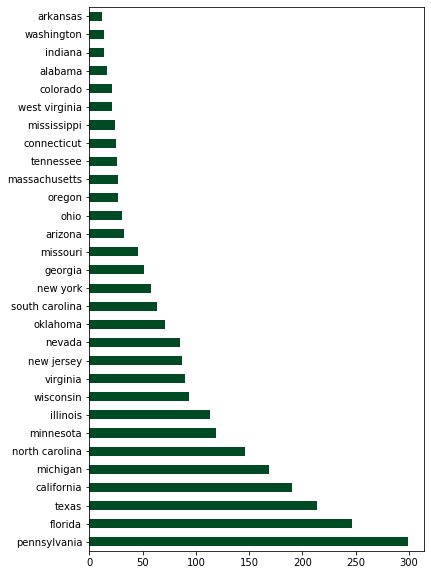

In [37]:
imdb['state'].value_counts().head(30).plot(kind='barh', figsize=(6,10))

7. El color mas usado en autos 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]),
 <a list of 49 Text xticklabel objects>)

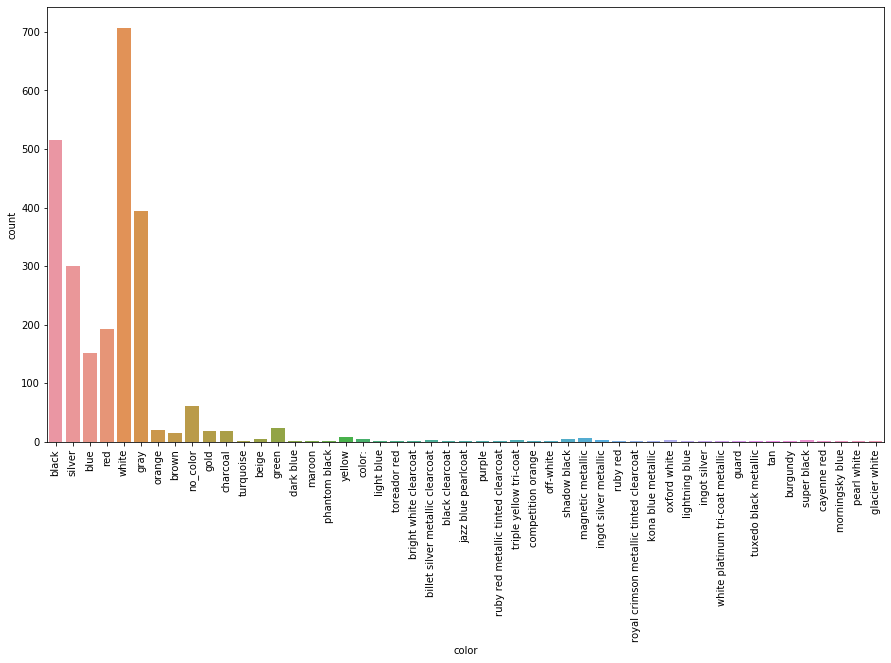

In [40]:
plt.figure(figsize=(15,8))
sns.countplot(imdb['color']);
plt.xticks(rotation=90)

# 8. Precios segun los años

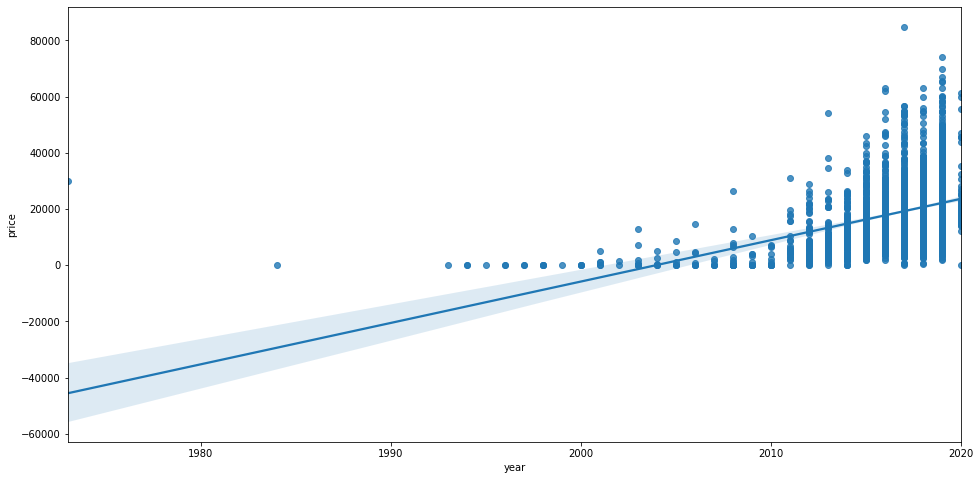

In [11]:
data = imdb[['price','year']]
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.regplot(x='year', y="price", data=data)

9.Distribuciones de millas y precios 

Text(0.5, 0, 'Distance Travelled (Miles)')

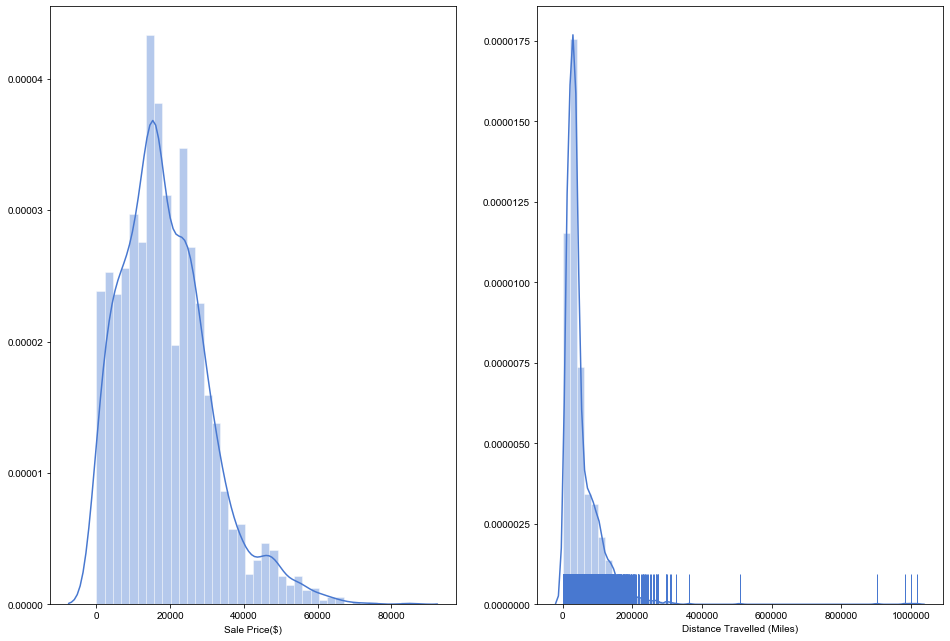

In [12]:
sns.set_palette("muted")
fig, (ax0, ax1) = plt.subplots(nrows=1,ncols=2, figsize=(16,11))
sns.set_style("darkgrid")
sns.distplot(imdb['price'],ax = ax0)
sns.distplot(imdb["mileage"],hist = True, rug = True, ax= ax1)
ax0.set_xlabel("Sale Price($)")
ax1.set_xlabel("Distance Travelled (Miles)")

10.Distribución del precio de venta según el año de registro del vehículo

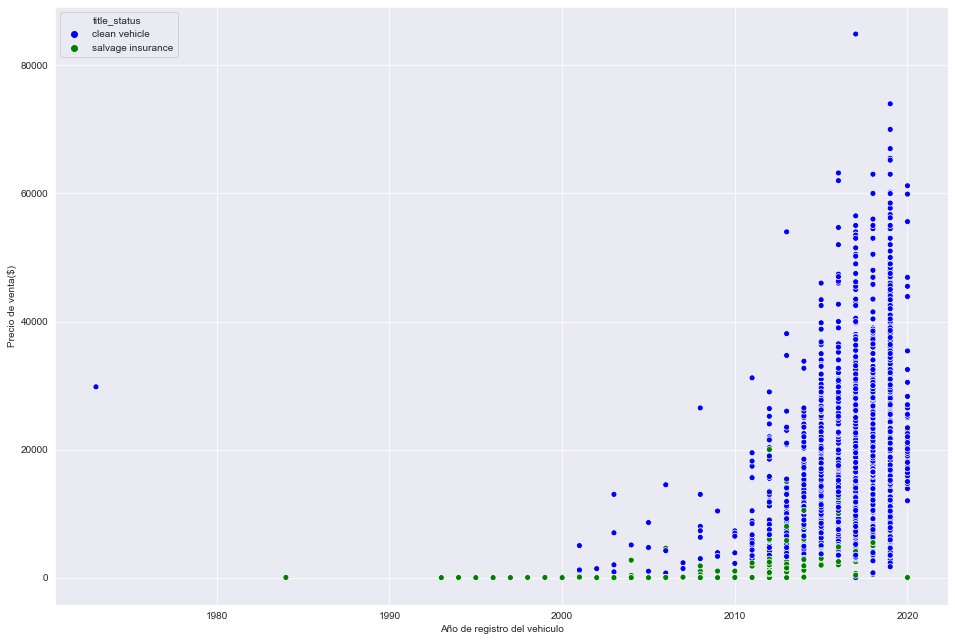

In [16]:
custom_palette = ["blue", "green", "orange","red","yellow", "purple"]
sns.set_palette(custom_palette)
fig, ax = plt.subplots(figsize = (16,11))
sns.scatterplot(x = "year", y = "price", hue = "title_status", data = imdb, ax = ax)
ax.set_xlabel("Año de registro del vehiculo")
ax.set_ylabel("Precio de venta($)")
plt.show()

11. Precio de distribucion por estado

Text(0, 0.5, 'State')

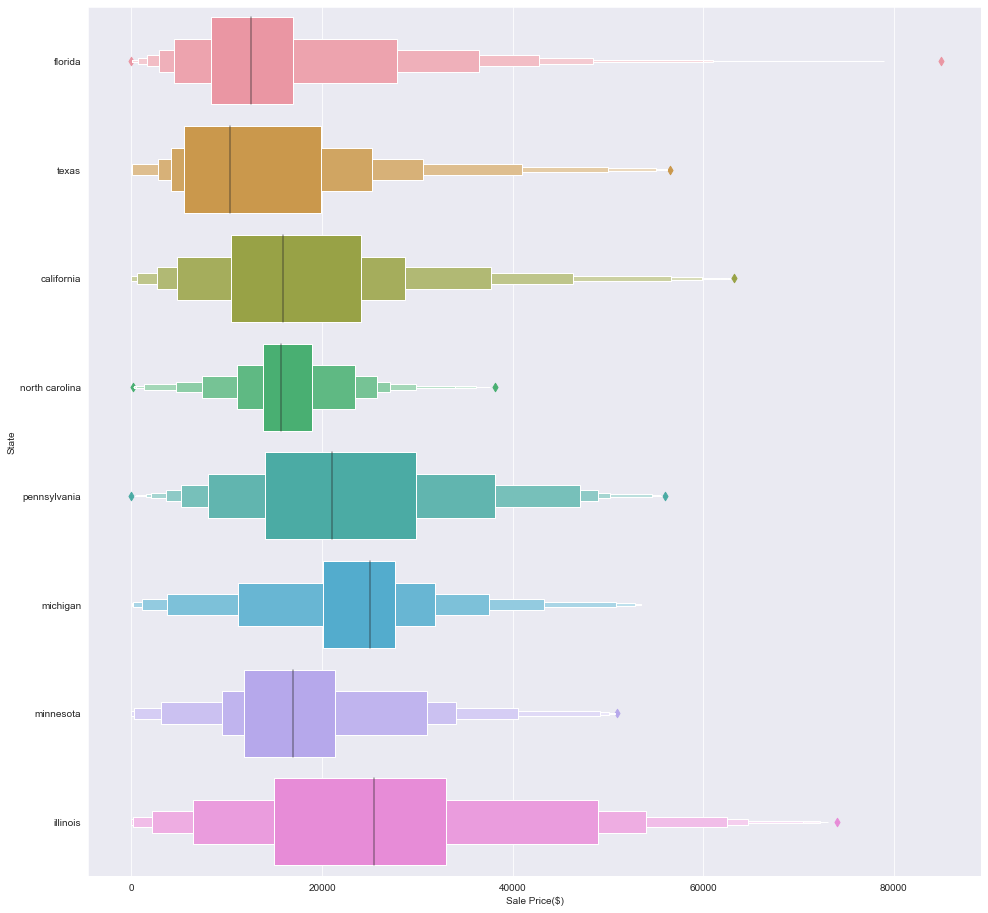

In [39]:
over100_states = imdb["state"].value_counts()[imdb["state"].value_counts() >= 100].index
df_over100_cars_per_state = imdb[imdb["state"].isin(over100_states)]
fig, ax = plt.subplots(figsize = (16,16))
sns.boxenplot(data=df_over100_cars_per_state, y="state",
x="price", ax=ax)
ax.set_xlabel("Sale Price($)")
ax.set_ylabel("State")



In [3]:
path1 = 'C:/Users/jeffe/Documents/GIT/python/py-collantes-yunga-jefferson-paul/Proyecto_Individual/CSV/data/autos.csv'


In [6]:
df = pd.read_csv('C:/Users/jeffe/Documents/GIT/python/py-collantes-yunga-jefferson-paul/Proyecto_Individual/CSV/data/autos.csv', sep=',', header=0, encoding='cp1252')
df.sample(10)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
173436,2016-03-05 22:41:40,Volkswagen_up!_BlueMotion_Technology_take_up!_...,privat,Angebot,7150,control,kleinwagen,2012,manuell,60,up,30000,6,benzin,volkswagen,nein,2016-03-05 00:00:00,0,59227,2016-04-07 08:45:27
48626,2016-03-30 08:54:46,Bmw_318_M_Ausstattung_6_Gang,privat,Angebot,9990,control,limousine,2007,manuell,124,3er,100000,8,NaN,bmw,nein,2016-03-30 00:00:00,0,31867,2016-04-06 23:16:45
252560,2016-03-07 12:57:12,Volkswagen_Touran_2.0_EcoFuel_Conceptline,privat,Angebot,6900,test,bus,2007,manuell,109,touran,90000,8,cng,volkswagen,nein,2016-03-07 00:00:00,0,56070,2016-04-06 19:46:41
342196,2016-04-04 16:58:10,Skoda_Fabia_1.2_HTP_SPECIAL,privat,Angebot,4900,test,kleinwagen,2011,manuell,60,fabia,90000,3,benzin,skoda,nein,2016-04-04 00:00:00,0,8606,2016-04-06 18:47:04
151987,2016-03-20 22:51:23,Volkswagen_Multivan_T4_TDI_Topstar,privat,Angebot,5800,test,bus,1997,manuell,102,transporter,150000,9,diesel,volkswagen,ja,2016-03-20 00:00:00,0,23881,2016-03-22 04:17:08
187149,2016-03-11 16:49:24,Volkswagen_Polo,privat,Angebot,500,test,kleinwagen,1991,manuell,54,polo,150000,9,benzin,volkswagen,nein,2016-03-11 00:00:00,0,31234,2016-04-05 15:17:58
370091,2016-03-07 08:36:42,Nissan_Primera_STW_Top_Sport_tuev_2018,privat,Angebot,2100,control,NaN,2000,manuell,150,NaN,150000,11,NaN,nissan,NaN,2016-03-07 00:00:00,0,51503,2016-04-06 00:47:02
126182,2016-03-31 13:56:31,Polo_bj.2009,privat,Angebot,5299,control,kleinwagen,2009,manuell,60,NaN,125000,6,benzin,volkswagen,nein,2016-03-31 00:00:00,0,26160,2016-04-06 06:44:54
238239,2016-03-18 09:47:32,MB_C_klasse_270_CDI_TÜV_Neu_Gruene_Plakate_Sup...,privat,Angebot,3699,control,NaN,2018,automatik,170,c_klasse,150000,8,NaN,mercedes_benz,nein,2016-03-18 00:00:00,0,10997,2016-03-18 09:47:32
215350,2016-03-08 15:42:28,BMW_520iA_Touring_//_Shadow_Line_//_AHK_//_Xen...,privat,Angebot,4700,test,kombi,2002,automatik,170,5er,150000,2,benzin,bmw,nein,2016-03-08 00:00:00,0,45472,2016-03-29 20:46:36


In [10]:
print("Too new: %d" % df.loc[df.yearOfRegistration >= 2017].count()['name'])
print("Too old: %d" % df.loc[df.yearOfRegistration < 1950].count()['name'])
print("Too cheap: %d" % df.loc[df.price < 100].count()['name'])
print("Too expensive: " , df.loc[df.price > 150000].count()['name'])
print("Too few km: " , df.loc[df.kilometer < 5000].count()['name'])
print("Too many km: " , df.loc[df.kilometer > 200000].count()['name'])
print("Too few PS: " , df.loc[df.powerPS < 10].count()['name'])
print("Too many PS: " , df.loc[df.powerPS > 500].count()['name'])
print("Fuel types: " , df['fuelType'].unique())
#print("Offer types: " , df['offerType'].unique())
#print("Sellers: " , df['seller'].unique())
print("Damages: " , df['notRepairedDamage'].unique())
#print("Pics: " , df['nrOfPictures'].unique()) # nrOfPictures : number of pictures in the ad (unfortunately this field contains everywhere a 0 and is thus useless (bug in crawler!) )
#print("Postale codes: " , df['postalCode'].unique())
print("Vehicle types: " , df['vehicleType'].unique())
print("Brands: " , df['brand'].unique())

# Cleaning data
#valid_models = df.dropna()

#### Removing the duplicates
dedups = df.drop_duplicates(['name','price','vehicleType','yearOfRegistration'
                         ,'gearbox','powerPS','model','kilometer','monthOfRegistration','fuelType'
                         ,'notRepairedDamage'])

#### Removing the outliers
dedups = dedups[
        (dedups.yearOfRegistration <= 2016) 
      & (dedups.yearOfRegistration >= 1950) 
      & (dedups.price >= 100) 
      & (dedups.price <= 150000) 
      & (dedups.powerPS >= 10) 
      & (dedups.powerPS <= 500)]

print("-----------------\nData kept for analisys: %d percent of the entire set\n-----------------" % (100 * dedups['name'].count() / df['name'].count()))

Too new: 14680
Too old: 289
Too cheap: 13320
Too expensive:  232
Too few km:  0
Too many km:  0
Too few PS:  41040
Too many PS:  835
Fuel types:  ['benzin' 'diesel' nan 'lpg' 'andere' 'hybrid' 'cng' 'elektro']
Damages:  [nan 'ja' 'nein']
Vehicle types:  [nan 'coupe' 'suv' 'kleinwagen' 'limousine' 'cabrio' 'bus' 'kombi'
 'andere']
Brands:  ['volkswagen' 'audi' 'jeep' 'skoda' 'bmw' 'peugeot' 'ford' 'mazda'
 'nissan' 'renault' 'mercedes_benz' 'opel' 'seat' 'citroen' 'honda' 'fiat'
 'mini' 'smart' 'hyundai' 'sonstige_autos' 'alfa_romeo' 'subaru' 'volvo'
 'mitsubishi' 'kia' 'suzuki' 'lancia' 'porsche' 'toyota' 'chevrolet'
 'dacia' 'daihatsu' 'trabant' 'saab' 'chrysler' 'jaguar' 'daewoo' 'rover'
 'land_rover' 'lada']
-----------------
Data kept for analisys: 81 percent of the entire set
-----------------


In [11]:
dedups['notRepairedDamage'].fillna(value='not-declared', inplace=True)
dedups['fuelType'].fillna(value='not-declared', inplace=True)
dedups['gearbox'].fillna(value='not-declared', inplace=True)
dedups['vehicleType'].fillna(value='not-declared', inplace=True)
dedups['model'].fillna(value='not-declared', inplace=True)

12. Carros con transmision automatica y manual 

gearbox
manuell         231997
automatik        66876
not-declared      5260
Name: gearbox, dtype: int64


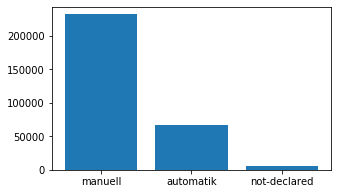

In [14]:
categories = ['gearbox']

for i, c in enumerate(categories):
    v = dedups[c].unique()
    
    g = dedups.groupby(by=c)[c].count().sort_values(ascending=False)
    r = range(min(len(v), 5))

    print( g.head())
    plt.figure(figsize=(5,3))
    plt.bar(r, g.head()) 
    #plt.xticks(r, v)
    plt.xticks(r, g.index)
    plt.show()

13. Tipos de cimbustibles 

fuelType
benzin          189919
diesel           93299
not-declared     15400
lpg               4646
cng                474
Name: fuelType, dtype: int64


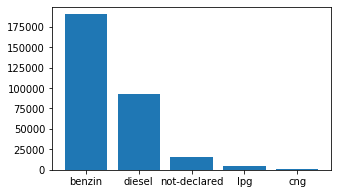

In [19]:
categories = ['fuelType']
for i, c in enumerate(categories):
    v = dedups[c].unique()
    
    g = dedups.groupby(by=c)[c].count().sort_values(ascending=False)
    r = range(min(len(v), 5))

    print( g.head())
    plt.figure(figsize=(5,3))
    plt.bar(r, g.head()) 
    plt.xticks(r, g.index)
    plt.show()

14. Cuales son los tipos de vehiculos usados 

vehicleType
limousine     84843
kleinwagen    68415
kombi         59863
bus           26986
cabrio        20921
Name: vehicleType, dtype: int64


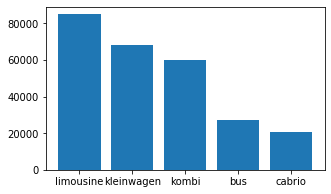

In [20]:
categories = [ 'vehicleType']

for i, c in enumerate(categories):
    v = dedups[c].unique()
    
    g = dedups.groupby(by=c)[c].count().sort_values(ascending=False)
    r = range(min(len(v), 5))

    print( g.head())
    plt.figure(figsize=(5,3))
    plt.bar(r, g.head()) 
    #plt.xticks(r, v)
    plt.xticks(r, g.index)
    plt.show()

15.Autos no reparados 

notRepairedDamage
nein            233684
not-declared     42124
ja               28325
Name: notRepairedDamage, dtype: int64


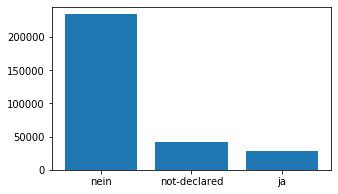

In [22]:
categories = ['notRepairedDamage']

for i, c in enumerate(categories):
    v = dedups[c].unique()
    
    g = dedups.groupby(by=c)[c].count().sort_values(ascending=False)
    r = range(min(len(v), 5))

    print( g.head())
    plt.figure(figsize=(5,3))
    plt.bar(r, g.head()) 
    #plt.xticks(r, v)
    plt.xticks(r, g.index)
    plt.show()

16. Autos mas vendidos en alemania 

brand
volkswagen       64853
bmw              34441
opel             31757
mercedes_benz    29562
audi             27984
Name: brand, dtype: int64


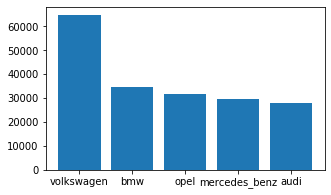

In [26]:
categories = ['brand']

for i, c in enumerate(categories):
    v = dedups[c].unique()
    
    g = dedups.groupby(by=c)[c].count().sort_values(ascending=False)
    r = range(min(len(v), 5))

    print( g.head())
    plt.figure(figsize=(5,3))
    plt.bar(r, g.head()) 
    #plt.xticks(r, v)
    plt.xticks(r, g.index)
    plt.show()

17. El modelo mas vendido de volkswagen

model
golf            24846
andere          21733
3er             17704
not-declared    11347
polo            10477
Name: model, dtype: int64


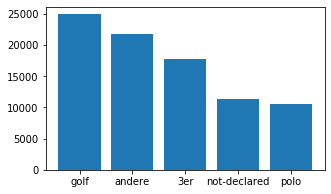

In [27]:
categories = ['model']

for i, c in enumerate(categories):
    v = dedups[c].unique()
    
    g = dedups.groupby(by=c)[c].count().sort_values(ascending=False)
    r = range(min(len(v), 5))

    print( g.head())
    plt.figure(figsize=(5,3))
    plt.bar(r, g.head()) 
    #plt.xticks(r, v)
    plt.xticks(r, g.index)
    plt.show()

18. Porcentaje de autos que estan reparados

cars with unrepaired damage: 0
cars without unrepaired damage: 0
total cars: 275503
percentage with unrepaired damage: 10.875380667361155%
percentage without unrepaired damage: 89.12461933263884%


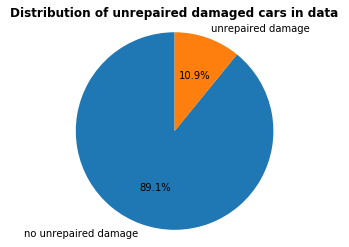

In [28]:


print("cars with unrepaired damage: " + str(len(df[df["notRepairedDamage"] == 1])))
print("cars without unrepaired damage: " + str(len(df[df["notRepairedDamage"] == 0])))
print("total cars: " + str(245541 + 29962))
print("percentage with unrepaired damage: " + str(100 / 275503 * 29962) + "%")
print("percentage without unrepaired damage: " + str(100 / 275503 * 245541) + "%")
labels = 'no unrepaired damage', 'unrepaired damage'
sizes = [89.12461933263884, 10.875380667361155]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Distribution of unrepaired damaged cars in data", fontweight="bold")

plt.show()

